# MATH 458 Monte Carlo Project

### Group Members: Rohan Sanjay, Timothy Wu, Denver Yu

To do: 
- Numbers
    - results
    - efficiency (time)
    - parameters
- Visuals
    - charts
    - graphs
        - use .kde to generate a pdf
- Write ups
    - restate the question
    - discuss the methods
    - complexity analysis
    - do a test first
- Formatting
    - Question number header (##)
    - markdowns cells for writeups
    - code in functions (at the bottom) called for each question answer

## Imports for libraries used

In [271]:
import matplotlib.pyplot as plt
import math
import numpy as np
import time
import pandas as pd
from scipy.stats import norm

## Question 7

Here, we compute an estimate of the integral I using three different approaches. These methods are helpful in estimating the values of integrals that are difficult to compute analytically. 

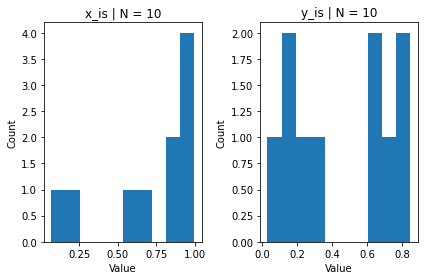

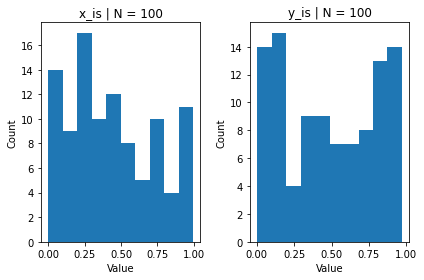

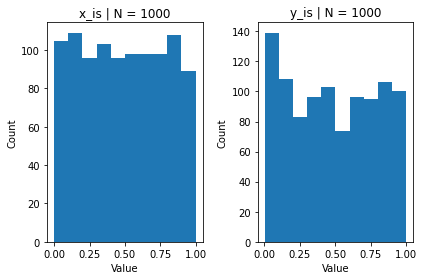

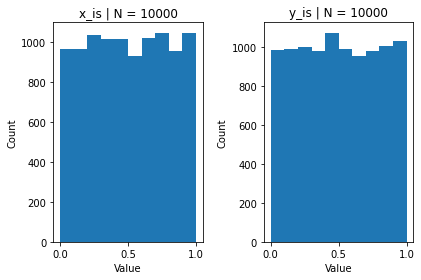

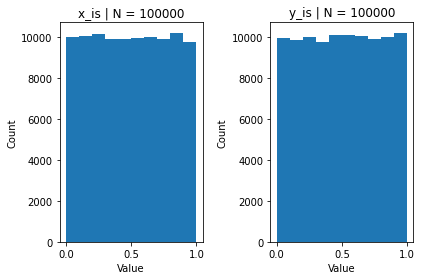

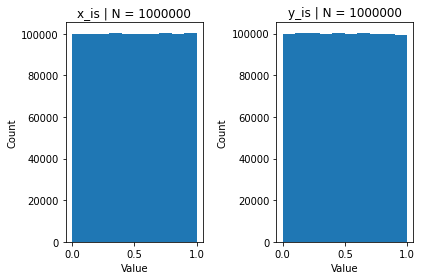

In [324]:
data = generate_and_plot_question_seven_data()

The histograms above show our generated data that we will use in parts a, b, and c. The generated data consists of x_is and y_is where X and Y are uniform(0, 1). We can notice that as N increases, especially when large, the histograms reflect data that is much more uniformly distributed. We will use this data to compute expected values that will give us estimates of I. 

In [352]:
true_intergral_estimate = 4.89916

We were unable to find an analytical solution to the integral of a way to calculate the error of monte carlo methods. So to approximate our error, we will use the above value computed by Wolfram Alpha. 

### a)

,simple_monte_carlo_estimate,cpu_time,error,confidence_intervals
N,,,,
10,7.282192,0.000599,2.383032,"(2.074, 12.49)"
100,4.442064,0.000078,0.457096,"(3.251, 5.633)"
1000,4.757435,0.000067,0.141725,"(4.386, 5.128)"
10000,4.943820,0.000727,0.044660,"(4.825, 5.062)"
100000,4.909617,0.003458,0.010457,"(4.873, 4.947)"
1000000,4.897395,0.028607,0.001765,"(4.886, 4.909)"


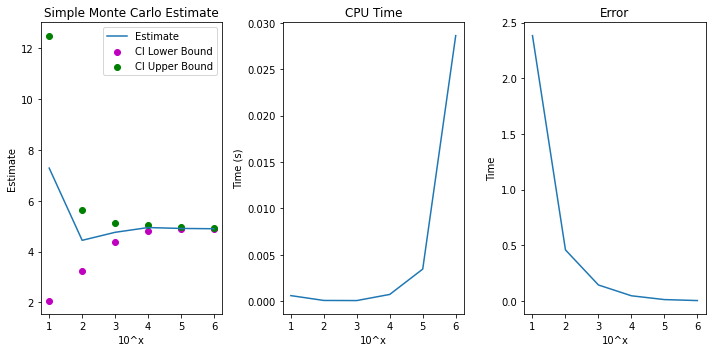

In [362]:
question_seven_part_a(data)

### b)

,antithetic_estimates,cpu_time,error,confidence_intervals
N,,,,
10,4.950188,0.000102,0.051028,"(2.589, 7.312)"
100,5.596337,0.000041,0.697177,"(4.709, 6.484)"
1000,4.992304,0.000140,0.093144,"(4.777, 5.207)"
10000,4.874595,0.000807,0.024565,"(4.809, 4.94)"
100000,4.887894,0.003346,0.011266,"(4.867, 4.909)"
1000000,4.895221,0.025505,0.003939,"(4.889, 4.902)"


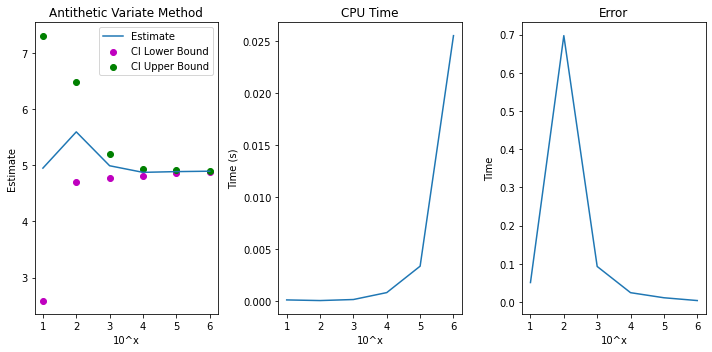

In [363]:
question_seven_part_b(data)

### c)

U and V are uniform(0, 1)

E[U] = (1 + 0) / 2 = 0.5  
E[V] = (1 + 0) / 2 = 0.5

,control_variate_estimates,cpu_time,error,confidence_intervals
N,,,,
10,4.950188,0.000082,0.051028,"(2.589, 7.312)"
100,5.596337,0.000038,0.697177,"(4.709, 6.484)"
1000,4.992304,0.000188,0.093144,"(4.777, 5.207)"
10000,4.874595,0.001035,0.024565,"(4.809, 4.94)"
100000,4.887894,0.004059,0.011266,"(4.867, 4.909)"
1000000,4.895221,0.045086,0.003939,"(4.889, 4.902)"


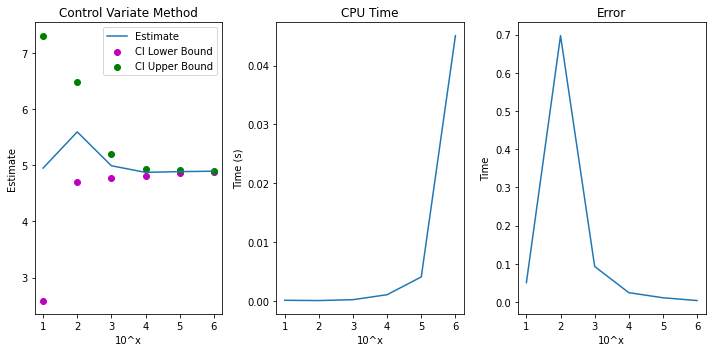

In [358]:
def question_seven_part_c(data):
    control_variate_estimates = []
    times = []
    confidence_intervals = []
    N = np.power(np.full(6, 10), range(1, 7))
    idx = range(len(N))

    for i in idx:
        start_time = time.time()
        n = N[i]
        x_is, y_is = data[i]
        
        # Y_1 = U + V
        # mu = E[Y_1] = E[U + V] = E[U] + E[V] = 1
        # C = -Cov(Xi, Yi) / Var(Yi)
        # Cov(X, Y) = EXY - EXEY
        y_1 = x_is + y_is
        mu = 1
        
        
        xis_plus_yis_squared = np.square(x_is + y_is)
        e_to_the_xis_plus_yis_squared = np.exp(xis_plus_yis_squared)
        m1_estimate = np.mean(e_to_the_xis_plus_yis_squared)
        
        # mu 2 (1 - xi + 1 - yi)
        one_minus_xis_plus_yis_squared = np.square(1 - x_is + 1 - y_is)
        e_to_the_one_minus_xis_plus_yis_squared = np.exp(one_minus_xis_plus_yis_squared)
        m2_estimate = np.mean(e_to_the_one_minus_xis_plus_yis_squared)
        
        estimate = 0.5 * (m1_estimate + m2_estimate)
        control_variate_estimates.append(estimate)
        
        # time
        end_time = time.time()
        time_taken = end_time - start_time
        times.append(time_taken)
        
        #CI
        sample_std = np.std(0.5 * (e_to_the_xis_plus_yis_squared + e_to_the_one_minus_xis_plus_yis_squared))
        (lb, ub) = estimate - 1.96 * sample_std / np.sqrt(n), estimate + 1.96 * sample_std / np.sqrt(n)
        confidence_intervals.append((np.round(lb, 3), np.round(ub, 3)))
        
    fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(10, 5))
    
    ci_lower_bounds = [x for (x,y) in confidence_intervals]
    ci_upper_bounds = [y for (x,y) in confidence_intervals]
    
    axs[0].plot(np.log10(N), control_variate_estimates, label='Estimate')
    axs[0].scatter(np.log10(N), ci_lower_bounds, c='m', label='CI Lower Bound')
    axs[0].scatter(np.log10(N), ci_upper_bounds, c='g', label='CI Upper Bound')
    axs[0].set_title('Control Variate Method')
    axs[0].set_xlabel('10^x')
    axs[0].set_ylabel('Estimate')
    axs[0].legend(loc='upper right')

    axs[1].plot(np.log10(N), times)
    axs[1].set_title('CPU Time')
    axs[1].set_xlabel('10^x')
    axs[1].set_ylabel('Time (s)')
    
    true_intergral_estimate_array = np.full(len(control_variate_estimates), true_intergral_estimate)
    error = np.abs(control_variate_estimates - true_intergral_estimate_array)
    axs[2].plot(np.log10(N), error)
    axs[2].set_title('Error')
    axs[2].set_xlabel('10^x')
    axs[2].set_ylabel('Time')
    
    df = pd.DataFrame(index=N)
    df.index.name = 'N'
    df['control_variate_estimates'] = control_variate_estimates
    df['cpu_time'] = times
    df['error'] = error
    df['confidence_intervals'] = confidence_intervals
    
    return df

question_seven_part_c(data)

### Question 7 Functions

In [321]:
def generate_and_plot_question_seven_data():
    N = np.power(np.full(6, 10), range(1, 7))
    data = []

    for n in N:
        x_is = np.random.uniform(0, 1, n)
        y_is = np.random.uniform(0, 1, n)

        data.append((x_is, y_is))
        
        
    for i in range(len(data)):
        fig, axs = plt.subplots(1, 2, tight_layout=True)
        data_for_sample = data[i]
        n = N[i]

        axs[0].hist(data_for_sample[0])
        axs[0].set_title("x_is | N = {}".format(n))
        axs[0].set_xlabel("Value")
        axs[0].set_ylabel("Count")

        axs[1].hist(data_for_sample[1])
        axs[1].set_title("y_is | N = {}".format(n))
        axs[1].set_xlabel("Value")
        axs[1].set_ylabel("Count")
        
    return data

In [360]:
def question_seven_part_a(data):
    simple_monte_carlo_estimates = []
    times = []
    confidence_intervals = []
    N = np.power(np.full(6, 10), range(1, 7))
    idx = range(len(N))

    for i in idx:
        start_time = time.time()
        n = N[i]
        
        # estimate
        x_is, y_is = data[i]
        xis_plus_yis_squared = np.square(x_is + y_is)
        e_to_the_xis_plus_yis_squared = np.exp(xis_plus_yis_squared)
        estimate = np.mean(e_to_the_xis_plus_yis_squared)
        simple_monte_carlo_estimates.append(estimate)
        
        # time
        end_time = time.time()
        time_taken = end_time - start_time
        times.append(time_taken)
        
        #CI
        sample_std = np.std(e_to_the_xis_plus_yis_squared)
        (lb, ub) = estimate - 1.96 * sample_std / np.sqrt(n), estimate + 1.96 * sample_std / np.sqrt(n)
        confidence_intervals.append((np.round(lb, 3), np.round(ub, 3)))

    fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(10, 5))
    
    ci_lower_bounds = [x for (x,y) in confidence_intervals]
    ci_upper_bounds = [y for (x,y) in confidence_intervals]
    
    axs[0].plot(np.log10(N), simple_monte_carlo_estimates, label='Estimate')
    axs[0].scatter(np.log10(N), ci_lower_bounds, c='m', label='CI Lower Bound')
    axs[0].scatter(np.log10(N), ci_upper_bounds, c='g', label='CI Upper Bound')
    axs[0].set_title('Simple Monte Carlo Estimate')
    axs[0].set_xlabel('10^x')
    axs[0].set_ylabel('Estimate')
    axs[0].legend(loc='upper right')

    axs[1].plot(np.log10(N), times)
    axs[1].set_title('CPU Time')
    axs[1].set_xlabel('10^x')
    axs[1].set_ylabel('Time (s)')
    
    true_intergral_estimate = 4.89916
    true_intergral_estimate_array = np.full(len(simple_monte_carlo_estimates), true_intergral_estimate)
    error = np.abs(simple_monte_carlo_estimates - true_intergral_estimate_array)
    axs[2].plot(np.log10(N), error)
    axs[2].set_title('Error')
    axs[2].set_xlabel('10^x')
    axs[2].set_ylabel('Time')
    
    df = pd.DataFrame(index=N)
    df.index.name = 'N'
    df['simple_monte_carlo_estimate'] = simple_monte_carlo_estimates
    df['cpu_time'] = times
    df['error'] = error
    df['confidence_intervals'] = confidence_intervals
    
    return df

In [361]:
def question_seven_part_b(data):
    antithetic_estimates = []
    times = []
    confidence_intervals = []
    N = np.power(np.full(6, 10), range(1, 7))
    idx = range(len(N))

    for i in idx:
        start_time = time.time()
        n = N[i]
        
        # mu 1 (xi + yi)
        x_is, y_is = data[i]
        xis_plus_yis_squared = np.square(x_is + y_is)
        e_to_the_xis_plus_yis_squared = np.exp(xis_plus_yis_squared)
        m1_estimate = np.mean(e_to_the_xis_plus_yis_squared)
        
        # mu 2 (1 - xi + 1 - yi)
        one_minus_xis_plus_yis_squared = np.square(1 - x_is + 1 - y_is)
        e_to_the_one_minus_xis_plus_yis_squared = np.exp(one_minus_xis_plus_yis_squared)
        m2_estimate = np.mean(e_to_the_one_minus_xis_plus_yis_squared)
        
        estimate = 0.5 * (m1_estimate + m2_estimate)
        antithetic_estimates.append(estimate)
        
        # time
        end_time = time.time()
        time_taken = end_time - start_time
        times.append(time_taken)
        
        #CI
        sample_std = np.std(0.5 * (e_to_the_xis_plus_yis_squared + e_to_the_one_minus_xis_plus_yis_squared))
        (lb, ub) = estimate - 1.96 * sample_std / np.sqrt(n), estimate + 1.96 * sample_std / np.sqrt(n)
        confidence_intervals.append((np.round(lb, 3), np.round(ub, 3)))
        
    fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(10, 5))
    
    ci_lower_bounds = [x for (x,y) in confidence_intervals]
    ci_upper_bounds = [y for (x,y) in confidence_intervals]
    
    axs[0].plot(np.log10(N), antithetic_estimates, label='Estimate')
    axs[0].scatter(np.log10(N), ci_lower_bounds, c='m', label='CI Lower Bound')
    axs[0].scatter(np.log10(N), ci_upper_bounds, c='g', label='CI Upper Bound')
    axs[0].set_title('Antithetic Variate Method')
    axs[0].set_xlabel('10^x')
    axs[0].set_ylabel('Estimate')
    axs[0].legend(loc='upper right')

    axs[1].plot(np.log10(N), times)
    axs[1].set_title('CPU Time')
    axs[1].set_xlabel('10^x')
    axs[1].set_ylabel('Time (s)')
    
    true_intergral_estimate = 4.89916
    true_intergral_estimate_array = np.full(len(antithetic_estimates), true_intergral_estimate)
    error = np.abs(antithetic_estimates - true_intergral_estimate_array)
    axs[2].plot(np.log10(N), error)
    axs[2].set_title('Error')
    axs[2].set_xlabel('10^x')
    axs[2].set_ylabel('Time')
    
    df = pd.DataFrame(index=N)
    df.index.name = 'N'
    df['antithetic_estimates'] = antithetic_estimates
    df['cpu_time'] = times
    df['error'] = error
    df['confidence_intervals'] = confidence_intervals
    
    return df

## Question 8

Here, we want to compute the price of a European call option use a Monte Carlo simulation and the Black-Scholes formula, and compare the results of both

In [337]:
r = 0.04
sigma = 0.25
s_0 = 90
T = 2
K = 100

### a) 
In part a, we want to esimate the price of the European call option by Monte Carlo simulation. To do this, we first need to compute the price of the stock at time T using the Geometric Brownian Motion process. This process has the stock prices follow a series of steps, where each step is a drift plus or minus a random shock. The Weiner process incorporates an element of randomness through the form of a standard normal random variable with variance T. Once we compute the stock price using the Geometric Brownian motion process, we then subract the strike price to compute the price of the option. If the strike price is greater than the computed stock price, we set the price of the option to 0. Additionally, we include an adjusted estimate where we multiply this value by a discount factor to account for the time value of money to see if it makes our estimate more accurate. 

,option_price_estimates,option_price_estimates_adjusted,cpu_time
N,,,
10,15.694601,14.487943,0.000158
100,11.152626,10.295172,0.000896
1000,12.604146,11.635093,0.008391
10000,12.687773,11.712291,0.080489
100000,12.699268,11.722902,0.822609
1000000,12.639130,11.667388,8.969023


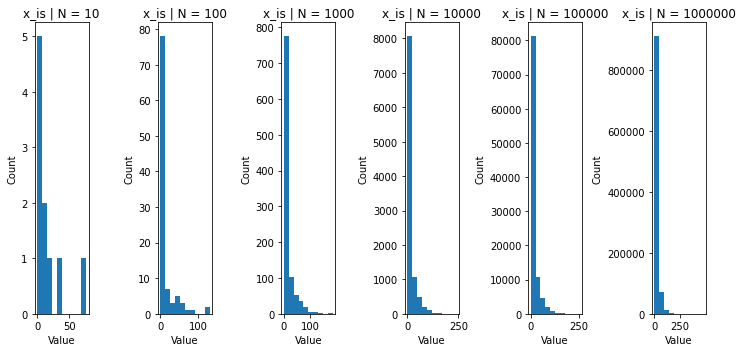

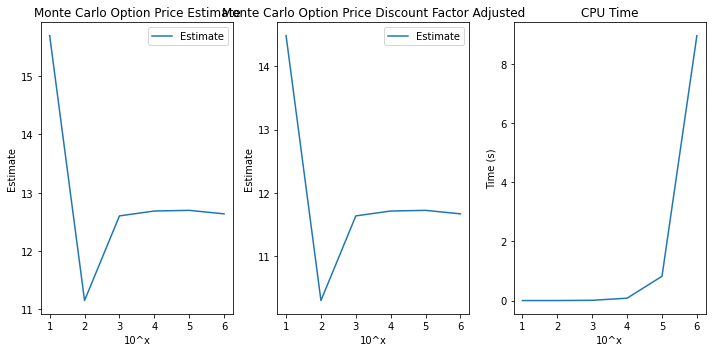

In [338]:
question_eight_part_a(r, sigma, s_0, T, K)

The results above indicates that as N increases, the Monte Carlo simulation is kind of converging to an option price of around $12.65 and an adjusted price of around 11.68. Additionally, we see a dramatic spike in CPU time required when N = 10^6 at 7.84 seconds, taking almost 10 times longer than when N = 10^5. The histograms above indicate that many of the option prices are being evaluated to 0 due to the Geometric Brownian Motion model computing a stock price that is less than the strike price of the option. 

### b)

Part b asks us to compute the price of the option using the Black Scholes formula, which is a deterministic model under a set of assumptions. 

In [273]:
bs_call(s_0, K, T, r, sigma)

11.667369027772402

The computed Black Scholes options price is $11.67

### c)

Here, we will compare the results from parts a and b. Our monte carlo simulations in part a with large sample sizes resulted in values very close to what we compute using the Black Scholes formula, specifially when accounting for the discount factor. The discount factor is important because it accounts for time value of money. It would be very important to make note of this when using these models in practice because slight increases in accuracy can result in large increases in profit due to the fierce competition and tightening spreads in financial markets. It makes sense that the monte carlo simulation with a large enough sample size computes an options price that matches the Black Scholes formula because the formula uses Geometric Brownian motion to model stock prices under the assumption that underlying price follows the lognormal distribution and the log-returns of price is normally distributed.

### Question 8 Functions

In [335]:
def question_eight_part_a(r, sigma, s_0, T, K):
    N = np.power(np.full(6, 10), range(1, 7))
    times = []
    option_price_estimates = []
    option_price_estimates_adjusted = []

    fig, axs = plt.subplots(1, 6, tight_layout=True, figsize=(10, 5))
    fig_num = 0
    for n in N:
        start_time = time.time()
        x_is = []
        x_is_adjusted = []
        for i in range(n):
            w_t = np.random.normal(0, np.sqrt(T))
            s_t = s_0 * np.exp(sigma * w_t + (r - np.square(sigma) / 2) * T)
            price = max(s_t - K, 0)
            price_discount_factor_adjusted = np.exp(-r * T) * max(s_t - K, 0)
            x_is.append(price)
            x_is_adjusted.append(price_discount_factor_adjusted)
        option_price_monte_carlo_estimate = np.mean(x_is)
        option_price_monte_carlo_estimate_adjusted = np.mean(x_is_adjusted)
        option_price_estimates.append(option_price_monte_carlo_estimate)
        option_price_estimates_adjusted.append(option_price_monte_carlo_estimate_adjusted)

        end_time = time.time()
        time_taken = end_time - start_time
        
        axs[fig_num].hist(x_is)
        axs[fig_num].set_title("x_is | N = {}".format(n))
        axs[fig_num].set_xlabel("Value")
        axs[fig_num].set_ylabel("Count")
        
        times.append(time_taken)
        fig_num += 1

    fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(10, 5))

    axs[0].plot(np.log10(N), option_price_estimates, label='Estimate')
    axs[0].set_title('Monte Carlo Option Price Estimate')
    axs[0].set_xlabel('10^x')
    axs[0].set_ylabel('Estimate')
    axs[0].legend(loc='upper right')
    
    axs[1].plot(np.log10(N), option_price_estimates_adjusted, label='Estimate')
    axs[1].set_title('Monte Carlo Option Price Discount Factor Adjusted')
    axs[1].set_xlabel('10^x')
    axs[1].set_ylabel('Estimate')
    axs[1].legend(loc='upper right')

    axs[2].plot(np.log10(N), times)
    axs[2].set_title('CPU Time')
    axs[2].set_xlabel('10^x')
    axs[2].set_ylabel('Time (s)')

    df = pd.DataFrame(index=N)
    df.index.name = 'N'
    df['option_price_estimates'] = option_price_estimates
    df['option_price_estimates_adjusted'] = option_price_estimates_adjusted
    df['cpu_time'] = times

    return df

In [272]:
def bs_call(S, K, T, r, sigma):
    norm_cdf = norm.cdf
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm_cdf(d1) - K * np.exp(-r*T)* norm_cdf(d2)

## Question 9

Here, we want to compute the price of a European call option for AMZN using 4 different methods. We assume that this option is expiry at the end of December, so T = 2. We are also using 0.25 for volatility, which we looked up. 

In [345]:
r = 0.02
sigma = 0.25
s_0 = 1765
T = 2
K = 1800

### a)
The equation for put call parity is as follows:  

C - P = U - PV where

- C = Call Option Price
- P = Put Option Price
- U = Spot Price of Underlying Asset
- PV = Present Value Strike Price = K / (1 + r)^T

In [329]:
bs_call(s_0, K, T, r, sigma)

263.3537716303654

In [343]:
put_call_parity(263.35, s_0, K, r, T)

228.45380622837365

### b)

Here, we can use the same function from 8a to estimate the price of the option by Monte Carlo with Geometric Brownian Motion

,option_price_estimates,option_price_estimates_adjusted,cpu_time
N,,,
10,273.296597,262.580484,0.000187
100,241.691365,232.214511,0.000889
1000,264.775451,254.393457,0.010473
10000,271.678251,261.025594,0.084934
100000,274.204268,263.452565,0.844228
1000000,274.406581,263.646945,8.369563


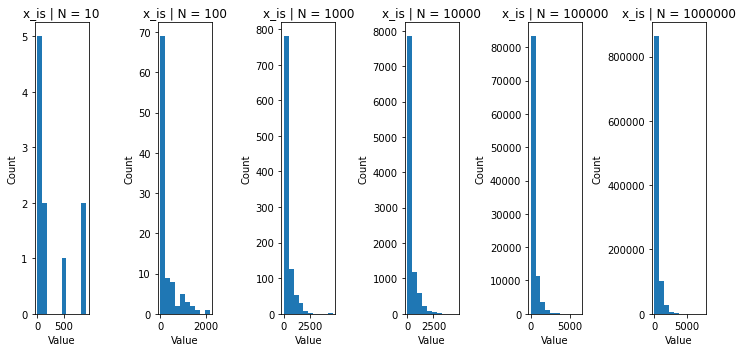

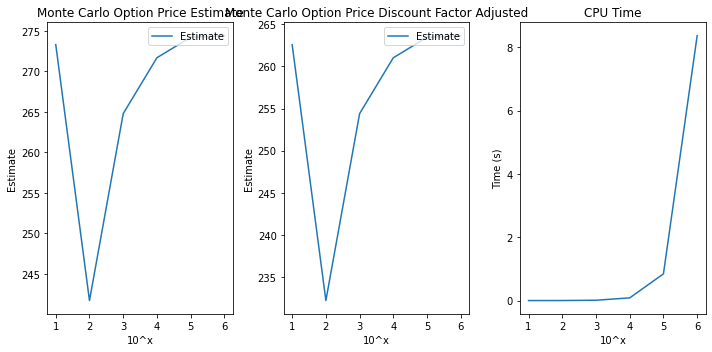

In [340]:
question_eight_part_a(r, sigma, s_0, T, K)

### c)

,option_price_estimates,cpu_time
N,,
10,194.656142,0.000211
100,288.658997,0.001455
1000,261.464351,0.012852
10000,262.375009,0.118926
100000,264.052247,1.162572
1000000,263.168708,12.551559


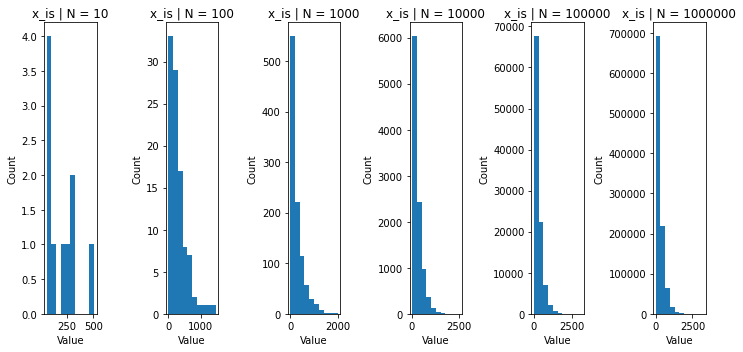

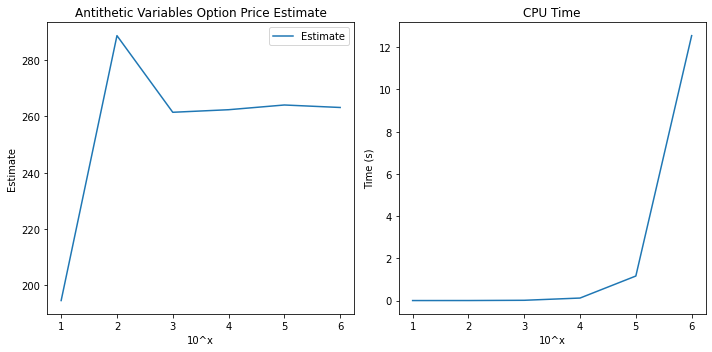

In [350]:
question_nine_part_c(r, sigma, s_0, T, K)

### d)

In [351]:
# rip part d :(

## Question 9 Functions

In [341]:
def put_call_parity(C, s_0, K, r, T):
    PV = K / (1 + r)**T
    return C - s_0 + PV

In [349]:
def question_nine_part_c(r, sigma, s_0, T, K):
    N = np.power(np.full(6, 10), range(1, 7))
    times = []
    option_price_estimates = []

    fig, axs = plt.subplots(1, 6, tight_layout=True, figsize=(10, 5))
    fig_num = 0
    for n in N:
        start_time = time.time()
        x_is = []
        for i in range(n):
            w_t = np.random.normal(0, np.sqrt(T))
            s_t1 = s_0 * np.exp(sigma * w_t + (r - np.square(sigma) / 2) * T)
            s_t2 = s_0 * np.exp(sigma * -w_t + (r - np.square(sigma) / 2) * T)
            
            price_1 = np.exp(-r * T) * max(s_t1 - K, 0)
            price_2 = np.exp(-r * T) * max(s_t2 - K, 0)
            price_avg = (price_1 + price_2) / 2
            
            x_is.append(price_avg)
            
        option_price_monte_carlo_estimate = np.mean(x_is)
        option_price_estimates.append(option_price_monte_carlo_estimate)        
        
        end_time = time.time()
        time_taken = end_time - start_time
        
        axs[fig_num].hist(x_is)
        axs[fig_num].set_title("x_is | N = {}".format(n))
        axs[fig_num].set_xlabel("Value")
        axs[fig_num].set_ylabel("Count")
        
        times.append(time_taken)
        fig_num += 1

    fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(10, 5))

    axs[0].plot(np.log10(N), option_price_estimates, label='Estimate')
    axs[0].set_title('Antithetic Variables Option Price Estimate')
    axs[0].set_xlabel('10^x')
    axs[0].set_ylabel('Estimate')
    axs[0].legend(loc='upper right')

    axs[1].plot(np.log10(N), times)
    axs[1].set_title('CPU Time')
    axs[1].set_xlabel('10^x')
    axs[1].set_ylabel('Time (s)')

    df = pd.DataFrame(index=N)
    df.index.name = 'N'
    df['option_price_estimates'] = option_price_estimates
    df['cpu_time'] = times

    return df